In [32]:
train_size = 47500

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import time
from sklearn.model_selection import cross_validate
%matplotlib inline

In [2]:
np.set_printoptions(precision=9)
np.set_printoptions(linewidth=np.inf)

In [3]:
X = np.load('../../X_train.npz')['arr_0']
Y = np.load('../../Y_train.npz')['arr_0']
TX = np.load('../../X_test.npz')['arr_0']

In [4]:
XTX = np.concatenate((X, TX), axis=0)

In [5]:
XTX_square = XTX ** 2
XTX_cumsum = np.concatenate((np.cumsum(XTX[:, :5000], axis=1), np.cumsum(XTX[:, 5000:], axis=1)), axis=1)
XTX_all = np.concatenate((XTX, XTX_square, XTX_cumsum), axis=1)

In [6]:
XTX_all.shape

(50000, 30000)

In [7]:
# Variance Threshold
var = XTX_all.var(axis=0)

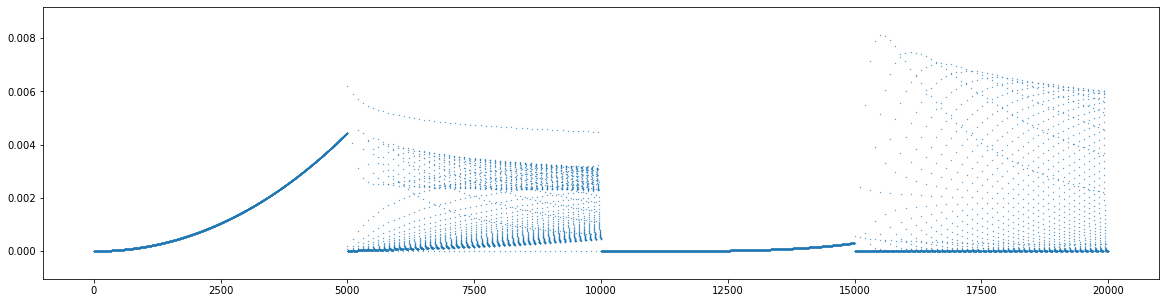

In [16]:
plt.figure(figsize=(20, 5))
plt.scatter(range(20000), var[:20000], s=0.1)

In [33]:
gbm = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=100,
                        n_jobs=-1)

In [59]:
# calculate type 1 error
def err1(y, y_pred):
    return np.sum(1.0 * np.abs(y_pred - y)) / len(y_pred)

# calculate type 2 errr
def err2(y, y_pred):
    return np.sum(np.abs(y_pred - y) / y) / len(y_pred)

In [31]:
cross_validate(gbm, X[:train_size], Y[:train_size, 0], 
               scoring=
               cv=5, 
               n_jobs=1,
               verbose=1,
               return_train_score=True,)

In [37]:
t = time.time()
gbm.fit(XTX_all[:45000], Y[:45000, 0], 
        eval_set=[(XTX_all[45000:47500], Y[45000:47500, 0])], 
        eval_metric='l1', 
        early_stopping_rounds=5)
print(time.time() - t)

[1]	valid_0's l1: 0.246823	valid_0's l2: 0.0801938
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.239272	valid_0's l2: 0.075318
[3]	valid_0's l1: 0.232278	valid_0's l2: 0.0709112
[4]	valid_0's l1: 0.225698	valid_0's l2: 0.0669072
[5]	valid_0's l1: 0.219521	valid_0's l2: 0.0632918
[6]	valid_0's l1: 0.213649	valid_0's l2: 0.0599666
[7]	valid_0's l1: 0.208144	valid_0's l2: 0.0569631
[8]	valid_0's l1: 0.202833	valid_0's l2: 0.0541556
[9]	valid_0's l1: 0.197945	valid_0's l2: 0.0516045
[10]	valid_0's l1: 0.193234	valid_0's l2: 0.0492339
[11]	valid_0's l1: 0.188833	valid_0's l2: 0.047087
[12]	valid_0's l1: 0.184743	valid_0's l2: 0.045107
[13]	valid_0's l1: 0.180924	valid_0's l2: 0.0433125
[14]	valid_0's l1: 0.177234	valid_0's l2: 0.0416534
[15]	valid_0's l1: 0.173823	valid_0's l2: 0.0401341
[16]	valid_0's l1: 0.170589	valid_0's l2: 0.0387506
[17]	valid_0's l1: 0.167493	valid_0's l2: 0.0374324
[18]	valid_0's l1: 0.16458	valid_0's l2: 0.0362434
[19]	valid_0's l

In [46]:
impt = gbm.feature_importances_

In [47]:
print(impt[0], var[0])

511 1.7040001149621759e-12


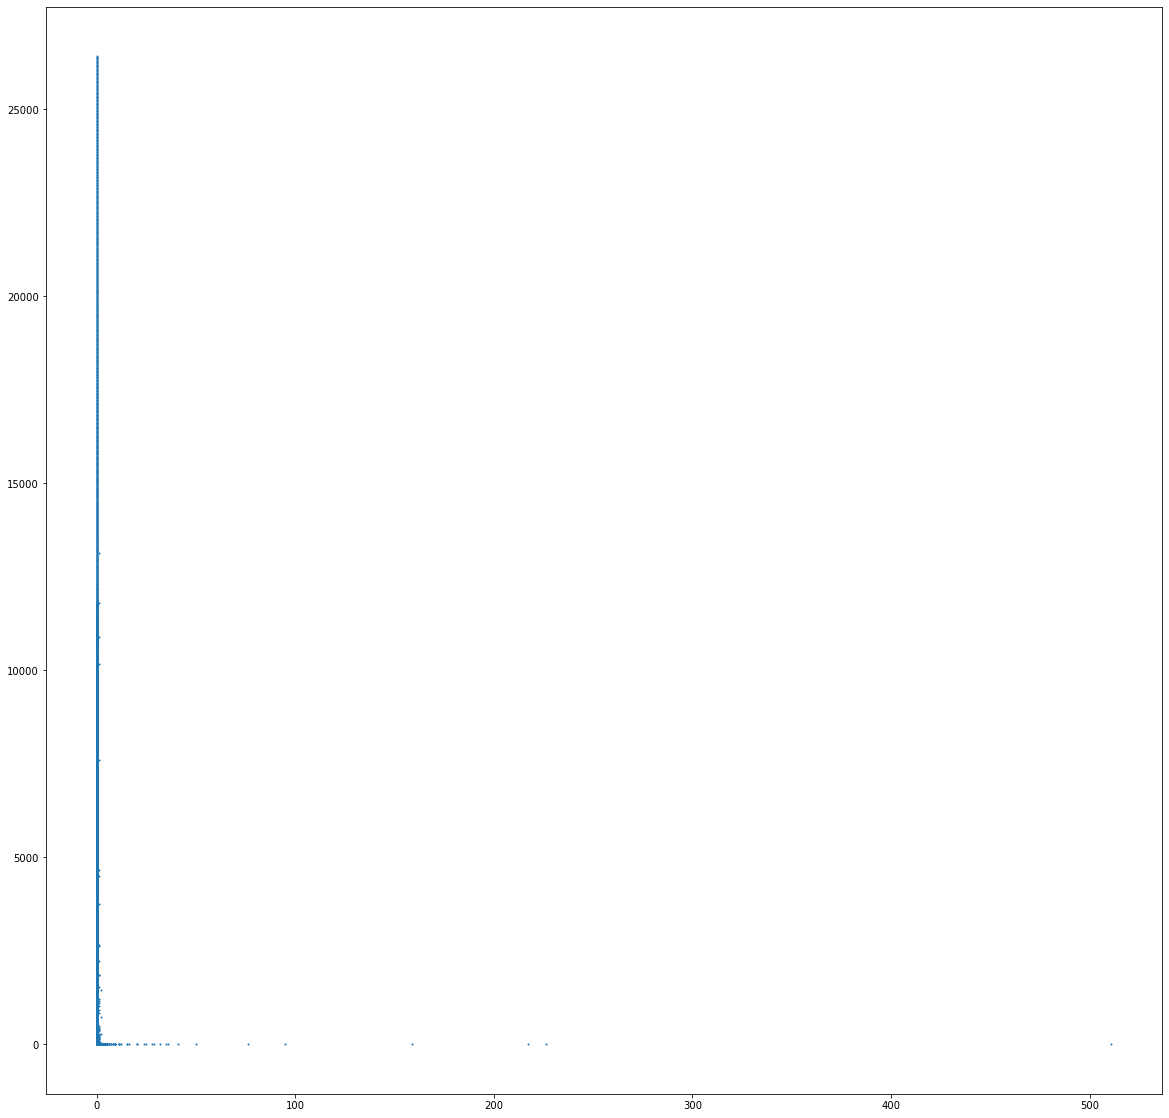

In [52]:
plt.figure(figsize=(20, 20))
plt.scatter(impt, var, s=1)

In [56]:
err2(gbm.predict(XTX_all[45000:47500]), Y[45000:47500, 0])

0.2523223070002524

In [57]:
err1(gbm.predict(XTX_all[45000:47500]), Y[45000:47500, 0])

30.26941341851931

In [58]:
ty0 = gbm.predict(XTX_all[47500:])

In [60]:
gbm2 = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=100,
                        n_jobs=-1)

t = time.time()
gbm2.fit(XTX_all[:45000], Y[:45000, 1], 
        eval_set=[(XTX_all[45000:47500], Y[45000:47500, 1])], 
        eval_metric='l1', 
        early_stopping_rounds=5)
print(time.time() - t)

[1]	valid_0's l1: 55.1016	valid_0's l2: 4047.7
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 53.3647	valid_0's l2: 3800.79
[3]	valid_0's l1: 51.7185	valid_0's l2: 3577.06
[4]	valid_0's l1: 50.1581	valid_0's l2: 3370.48
[5]	valid_0's l1: 48.6942	valid_0's l2: 3182.69
[6]	valid_0's l1: 47.3366	valid_0's l2: 3013.31
[7]	valid_0's l1: 45.9937	valid_0's l2: 2852.09
[8]	valid_0's l1: 44.7466	valid_0's l2: 2707.1
[9]	valid_0's l1: 43.5939	valid_0's l2: 2577.22
[10]	valid_0's l1: 42.5039	valid_0's l2: 2456.38
[11]	valid_0's l1: 41.4832	valid_0's l2: 2348.06
[12]	valid_0's l1: 40.4975	valid_0's l2: 2245.88
[13]	valid_0's l1: 39.5706	valid_0's l2: 2151.84
[14]	valid_0's l1: 38.6957	valid_0's l2: 2066.09
[15]	valid_0's l1: 37.8708	valid_0's l2: 1988.15
[16]	valid_0's l1: 37.036	valid_0's l2: 1911.15
[17]	valid_0's l1: 36.2502	valid_0's l2: 1841.53
[18]	valid_0's l1: 35.5315	valid_0's l2: 1778.67
[19]	valid_0's l1: 34.8564	valid_0's l2: 1721.51
[20]	valid_0's l1: 3

0.2523223070002524

In [63]:
print(err1(gbm2.predict(XTX_all[45000:47500]), Y[45000:47500, 1]))
print(err2(gbm2.predict(XTX_all[45000:47500]), Y[45000:47500, 1]))

21.397371596702726
0.15731405117583308


In [64]:
ty1 = gbm2.predict(XTX_all[47500:])

In [ ]:
gbm3 = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=100,
                        n_jobs=-1)

t = time.time()
gbm3.fit(XTX_all[:45000], Y[:45000, 2], 
        eval_set=[(XTX_all[45000:47500], Y[45000:47500, 2])], 
        eval_metric='l1', 
        early_stopping_rounds=5)
print(time.time() - t)

print(200.0 * err1(gbm3.predict(XTX_all[45000:47500]), Y[45000:47500, 2]))
print(err2(gbm3.predict(XTX_all[45000:47500]), Y[45000:47500, 2]))

In [65]:
# ty2 = gbm3.predict(XTX_all[47500:])
ty2 = np.array([0.5447981666561619, 0.9033794852954207, 0.8165607356283475, 0.8139528707216063, 0.7765567691341623, 0.8384202714240023, 0.8553361830435281, 0.5208623570140318, 0.8867228246914175, 0.6950352113549773, 0.6308386566094638, 0.9003720429107852, 0.5742821213223522, 0.5098162935015162, 0.6930589708107509, 0.822548873215119, 0.7620608766971075, 0.7650842658247486, 0.6692550744827024, 0.8447518710426136, 0.5269028353114662, 0.6409711557827982, 0.8723825958198943, 0.5099730563396614, 0.8061391158654999, 0.9346311196809229, 0.782492066716321, 0.699230729972617, 0.9769836669558424, 0.9216803212268149, 0.6638814360435894, 0.5291998879643633, 0.832327739289913, 0.7433189683047127, 0.7428737382051871, 0.6863123308863543, 0.6882340852640338, 0.6375637136111895, 0.5964398659028133, 0.7175655304662046, 0.9622783036027805, 0.910877054764851, 0.903668116985323, 0.6902707175809385, 0.8516426060204544, 0.6576541587932397, 0.9817068183016198, 0.9208208710537462, 0.6822148187486615, 0.8506396448188085, 0.8712871732408383, 0.5290083886651087, 0.9182385427909555, 0.9442986838123552, 0.8906953719125115, 0.9139847348407256, 0.9284871002135648, 0.8821301174917408, 0.5541467253255251, 0.6286296927083092, 0.6019813804964715, 0.7067698122045137, 0.9758103258366956, 0.8494483313406167, 0.6941866516097059, 0.6870581575631439, 0.9347174759921261, 0.8990931078607292, 0.848460905563348, 0.7921163860617347, 0.5671427126548456, 0.5701460507244865, 0.9335358732531324, 0.6921353256609635, 0.9105701808420145, 0.548475711292677, 0.6739761386442383, 0.8555384450002382, 0.7878580497033891, 0.600055700091937, 0.6790167122526519, 0.5683245423992409, 0.6176704823426838, 0.9347688688671542, 0.9380400380539413, 0.7307064354864238, 0.6392341179032438, 0.6617156232609875, 0.5671870637874983, 0.8751048184007987, 0.6041981208096158, 0.5576552332836734, 0.6988352120783993, 0.5652879274699565, 0.6054171241405044, 0.8237653246588369, 0.5584233181149528, 0.8452238262059804, 0.6295407658337497, 0.889793208136347, 0.8064135270390292, 0.5269845026019199, 0.6842319929643584, 0.951769726401231, 0.6899488648098956, 0.6310180508239954, 0.6404268840492494, 0.9719815105047729, 0.6837269080848943, 0.8196213874748757, 0.5910091106400602, 0.7991589552073675, 0.6834963906015077, 0.7618012918172237, 0.8452583583173426, 0.6537553768631537, 0.9768284403404814, 0.5954534697704588, 0.5300573033697575, 0.9181348315852658, 0.5288416346571383, 0.782334227523644, 0.7539181798268924, 0.5396727032739462, 0.9777857091419639, 0.5407779913027465, 0.9379083539307671, 0.578406701248429, 0.604927649221557, 0.8365692480278369, 0.8494598753194762, 0.5481021649873355, 0.8024867411915254, 0.5666876417600285, 0.7393566994874653, 0.9470153422256654, 0.7774297475299063, 0.530086944838615, 0.9903730268167368, 0.7855613909626848, 0.6815171452567843, 0.658352601945628, 0.8865620208940465, 0.5731179249003495, 0.5100826795147831, 0.7962266583632301, 0.7838887766201709, 0.7247415590514777, 0.7962803524375087, 0.9302315006001957, 0.8384742204193674, 0.5919135497670701, 0.7262554637035589, 0.9182988706061787, 0.5377593239362656, 0.6403442099420408, 0.5463999692428373, 0.8773618781991562, 0.9790112002632556, 0.8817795183897918, 0.7376333141753386, 0.6152541815448743, 0.9157560476882005, 0.901273648978762, 0.9745433181853221, 0.5168433778665217, 0.7405660460713571, 0.8888048052889501, 0.8272731202168375, 0.7789409374066691, 0.898292197364295, 0.5412050132627131, 0.650586900993115, 0.710260664961269, 0.5881990762080518, 0.9879327042175159, 0.8467667333377172, 0.7659591513735814, 0.6416375502039924, 0.7071338834249471, 0.5395404030546873, 0.7397104417764132, 0.7092123014884418, 0.951469971130148, 0.8719803118064405, 0.5334179525465564, 0.5485129257904046, 0.5523819984737313, 0.9725141201984657, 0.5189264214300078, 0.7128414914259456, 0.5177006315957656, 0.714560242557989, 0.5906060376025597, 0.7198335853818689, 0.8179276585310031, 0.8696455950305202, 0.7561670900692726, 0.5634284132250242, 0.8372324305889419, 0.9416081662445484, 0.963731294949248, 0.5505963831497911, 0.9776409122702221, 0.8434638740503161, 0.9396050001493113, 0.6061675681854264, 0.6232844778082546, 0.8339236097494824, 0.861143424531552, 0.7758562432393588, 0.9899303234531266, 0.7921494760146037, 0.8471108687398731, 0.6498487884486823, 0.9378584319752021, 0.9020469029173752, 0.8068957309565586, 0.5147401786820055, 0.7949173033126831, 0.7711368768783591, 0.824436502540309, 0.5505753972207706, 0.8551284101893044, 0.7448410103964919, 0.9603340756367532, 0.8955060102862653, 0.8006816878423099, 0.8143852078294553, 0.9426341466236676, 0.8701349218152891, 0.9510896756751671, 0.8500749687753817, 0.7439455202935257, 0.7600508580609121, 0.6414488294350414, 0.9836470155671724, 0.5999187289858551, 0.9698556925006494, 0.598427333094706, 0.7566156301741971, 0.8482705852148644, 0.9519788405660071, 0.8280646859591272, 0.7603829466267896, 0.9326332343910865, 0.8383840564073013, 0.8667729940573814, 0.9123050983013535, 0.6106881521773191, 0.8876004886208256, 0.7644178572100013, 0.8098287789194744, 0.9473555409011668, 0.523077167273977, 0.8704007534707418, 0.9525811152284784, 0.6308825257369113, 0.6985634056852339, 0.7986726061481669, 0.760089278164534, 0.8589530977526039, 0.8458891846913034, 0.595788040289543, 0.5477502586180905, 0.6437029943096454, 0.8051623068576449, 0.8180649871640228, 0.8638160748950073, 0.788928373151954, 0.7737072985048634, 0.8413608785592779, 0.8963560869649093, 0.5755943329105156, 0.8824539282603386, 0.7631338552054986, 0.5406052753992837, 0.5097726073553592, 0.8927756718870503, 0.8977966880936232, 0.9518650179807999, 0.8575535282914678, 0.5620946533832177, 0.8572052482014121, 0.6816222202409528, 0.5480012461414779, 0.5514545342217102, 0.539830704307264, 0.6331439244591344, 0.9231881750798879, 0.556989512459624, 0.6533383775796091, 0.712097412926807, 0.5730849477297656, 0.8315397695680276, 0.9851565257070134, 0.8694464481671076, 0.9026699432886566, 0.5105185051267411, 0.5314819692870751, 0.9084914648499444, 0.5870657571104331, 0.984048302112409, 0.5123080184308925, 0.7339018698270023, 0.5173855231652061, 0.6678298943372786, 0.5650934361979965, 0.5349776530045519, 0.5801805036876746, 0.7252563130078946, 0.5529730333555416, 0.5157731269249456, 0.7579179319771707, 0.9140179164768223, 0.71739957707117, 0.9455440595917277, 0.7825643077125636, 0.7074254116013972, 0.8055877792215901, 0.6770442936926238, 0.8588032633827226, 0.8647150342022563, 0.7278898983188747, 0.519064025936551, 0.81383001815691, 0.766356774996705, 0.8400849388806886, 0.7122133930690651, 0.5737089254405955, 0.5145399213923558, 0.5712290734808256, 0.619949231885133, 0.815964438368298, 0.9845026118444616, 0.8378505621716672, 0.5195275052156335, 0.5803816326304857, 0.6256764596089306, 0.8231837007982478, 0.9761522608613901, 0.8995934366130403, 0.7453536602257835, 0.9105763483584889, 0.9018696476699837, 0.5307711797027009, 0.8431623324477472, 0.8100594308750059, 0.5291881115183648, 0.5433915533233478, 0.7046294648747583, 0.5773201627513871, 0.5424880351119871, 0.7688463233089947, 0.6587785647051969, 0.9167818985398037, 0.6251432128551228, 0.9399667335972929, 0.6180007976171579, 0.8153792753212175, 0.6421330238160946, 0.7787404913680801, 0.8209923008777066, 0.880974547348075, 0.5159941491460928, 0.826360833976816, 0.7627874187627831, 0.9778626605411685, 0.5532997412874303, 0.5105759905551084, 0.5187963282622516, 0.5529637832966949, 0.522940177454052, 0.706416908488494, 0.6495867619674099, 0.534347880041838, 0.9129901673389877, 0.7689370016922138, 0.7745144298024089, 0.9461573549391782, 0.6977997986031599, 0.579915902480383, 0.7166895976531873, 0.8231167134361108, 0.6189719204238647, 0.9670801602879342, 0.9608106185256495, 0.9470897542675031, 0.8850714071534392, 0.7470451694005242, 0.705882375815761, 0.6247893560221153, 0.9794833647869701, 0.7793161070764568, 0.6118395898555902, 0.7339672728405987, 0.7987765422001767, 0.7215282781504326, 0.7673690702598088, 0.9226523382408377, 0.5097051914937224, 0.5434706670937867, 0.697016284691941, 0.6344173157208504, 0.669568962012822, 0.6857282323002978, 0.8344393264294575, 0.8270741451082394, 0.7795287491063256, 0.6912870875727313, 0.7851420415686535, 0.816915052450305, 0.9877244872749242, 0.878371851016375, 0.6399866843541931, 0.8379399656801136, 0.9447618922771569, 0.7040187559281635, 0.8627600228784732, 0.7040861558945999, 0.9179824147517371, 0.8144511714809493, 0.6545787476548139, 0.7920837331018036, 0.9837535807174809, 0.7614705281017115, 0.602012246131204, 0.8154693373359964, 0.8541202714908617, 0.7059934810004718, 0.5120566418624575, 0.7459390096821775, 0.947615373506828, 0.7217417432803468, 0.9096580048103847, 0.5977056726170764, 0.8778487674302536, 0.8439666038468298, 0.713914071200429, 0.6294232252304957, 0.6202823927395796, 0.9644818897607202, 0.9842265008697371, 0.5694860804287337, 0.5290609920040511, 0.6046495743961048, 0.5388923103896551, 0.8461013731005905, 0.8531613445669295, 0.5336276626001164, 0.7036734964383723, 0.701211614462648, 0.6783827296381953, 0.8866669835608936, 0.9233074863044305, 0.7926169904454431, 0.75625690488643, 0.8209330457047496, 0.570118695178265, 0.9485271295186862, 0.7301791597382026, 0.8956946559799908, 0.5948181022323469, 0.5459210059178905, 0.5751454704371195, 0.7563524673569247, 0.5226458292751016, 0.7063788720662205, 0.9534336732747516, 0.820676475044644, 0.5396988935325054, 0.8767666693739956, 0.7723243516904397, 0.5500837371219283, 0.7485975588068621, 0.6509459502796511, 0.75771349438115, 0.7626565929586298, 0.5755904620954375, 0.6276249641100412, 0.8971715453728913, 0.8831789590098079, 0.6819518347815676, 0.7904955586282607, 0.697042268553316, 0.5682718851562183, 0.7244249180319081, 0.5768259185481247, 0.6611446481986797, 0.553616933293338, 0.8311963140062691, 0.7097110775787163, 0.8097987974967285, 0.9511906509695504, 0.8913788077884364, 0.5527672228735624, 0.9119989338123219, 0.6510033431666343, 0.5546067691056773, 0.6619825343538552, 0.5200171518214352, 0.7777063624364435, 0.7401956721535322, 0.8185967732368645, 0.6558125703081759, 0.9689013639081278, 0.9683645097148763, 0.8068580809402067, 0.8703563064534369, 0.9219161229218721, 0.8672504149382352, 0.7745760801364341, 0.9629946636278431, 0.8532198305553492, 0.6098137316882579, 0.6598517422764126, 0.6637818305316591, 0.8091446741129728, 0.6771452836361324, 0.5522034533423187, 0.5738927661827535, 0.5109049532971881, 0.7659438036228494, 0.7219509804844851, 0.8621954891637968, 0.8081320063510052, 0.9686355936738792, 0.8411293598331195, 0.9239822405633712, 0.9635059988442872, 0.7507269783591903, 0.8625288518861951, 0.785109073758488, 0.8714121708788277, 0.8903603484084119, 0.6617156232609875, 0.7349943108030066, 0.9644748505440622, 0.7296523153185154, 0.7313722932257354, 0.6252438951361144, 0.7425531537362289, 0.8432362865552558, 0.7463181382844899, 0.7520198924191442, 0.7322354220864228, 0.8543978927596475, 0.6543704038675694, 0.8812513641276529, 0.7462324782439889, 0.7177953064145708, 0.6240753355831696, 0.8514238203440812, 0.9603381320529671, 0.5505194236812613, 0.6806062258429469, 0.6823752450855297, 0.5904553958991863, 0.9643680142955358, 0.9077605185963762, 0.7257216078425638, 0.5652487242333675, 0.5791460886221952, 0.783722409511674, 0.7554851901966734, 0.6334692443332915, 0.5914001364013882, 0.7553219216403232, 0.5326331325400836, 0.9880276468053604, 0.9763087423375558, 0.6970513428374427, 0.5958802774245022, 0.863293956289765, 0.9289290432813979, 0.9288305618026792, 0.7853334605510831, 0.7880571253319204, 0.6767332355490907, 0.7556887413271981, 0.9582635407890815, 0.765595661105271, 0.5144754334105407, 0.5405853311384982, 0.655283334647318, 0.7913216414056721, 0.8419116718073868, 0.5852110422771667, 0.9894489065070032, 0.9053654265671934, 0.9899303234531266, 0.990172088740006, 0.7578174698961103, 0.7826771164652389, 0.8347388987819001, 0.8295905250046074, 0.6107843549454195, 0.5155406647605543, 0.8806741303301487, 0.9045930276233397, 0.8135518491493646, 0.9591346233159068, 0.584724612915381, 0.976834048582835, 0.8802069785511107, 0.5155417187446322, 0.7642012162687362, 0.7689391969213594, 0.5625255509518778, 0.6470176465138535, 0.8253923546029128, 0.5854454316430202, 0.9551685188228953, 0.9829589086806156, 0.7742106619017433, 0.7302523021888657, 0.8218033033317049, 0.9811023140660622, 0.569082052116449, 0.5280017967849472, 0.956594480957354, 0.5989864881988637, 0.5761961236961715, 0.883620345655722, 0.7852110238963436, 0.552527196728668, 0.6403298477506069, 0.5992363091428703, 0.6358938600026706, 0.6672662864773504, 0.5845055654654314, 0.6387439659791985, 0.8480750845857888, 0.8025732620498406, 0.8541465301760871, 0.6310659766570795, 0.6317344628984054, 0.769633546582449, 0.5250622933099728, 0.9073203630137618, 0.6957591791036888, 0.9424952584363194, 0.5351325812980715, 0.869232568791185, 0.5996336760515609, 0.7412696566613037, 0.6818761279709733, 0.5599519022011344, 0.7752727910344173, 0.8855022466041873, 0.6231138575949731, 0.7415980082344378, 0.7046291227322053, 0.625031667258731, 0.5807683412061755, 0.6621211447951829, 0.6492570242945743, 0.8492121776381973, 0.6261667864943087, 0.9777537231974363, 0.912425501581725, 0.6657380541853705, 0.6136735492316849, 0.7894186449679576, 0.8815344472011765, 0.7764862702048246, 0.8184856093517809, 0.6211761960767577, 0.8007168713503225, 0.652649224725095, 0.8042998609646251, 0.6050216824628225, 0.9246515962905717, 0.5407617090889519, 0.732856918246737, 0.7812597406072, 0.9738418854544201, 0.9902076926330599, 0.5305467145217729, 0.655332804139481, 0.839850552693645, 0.8826258871713786, 0.7942335479732662, 0.71237713571008, 0.7993422774603689, 0.5497487097749169, 0.7240209913963328, 0.5338860660627995, 0.6719700026885789, 0.904714852426168, 0.9299331338729858, 0.736208967405911, 0.7770000870208148, 0.9575573740162545, 0.7479124947012445, 0.8416031073458768, 0.9319294290223746, 0.9518724695365556, 0.5615874361223042, 0.7096123913691975, 0.9320539819127245, 0.6313823105024632, 0.6378039204602123, 0.5330177436591536, 0.5357790944133203, 0.7329298270515453, 0.6475338487634167, 0.7114181097933847, 0.7439063098879556, 0.8239696103455106, 0.64537833523004, 0.618692438285867, 0.6230263688043435, 0.5856695239444698, 0.8892941901759585, 0.8055207343375312, 0.8828447106581062, 0.7912865615945008, 0.9874510363917566, 0.9647847847312453, 0.8095889652652096, 0.6315370256869701, 0.5895886661263209, 0.5482098669285769, 0.6329299104852733, 0.6669974376194115, 0.9184804588674507, 0.8481531190160942, 0.5099377924438822, 0.8297038234736225, 0.7804368829993952, 0.5717029099984469, 0.9475537352874606, 0.8183857425559082, 0.8425516287725401, 0.7269172542983873, 0.7823588607178478, 0.6692986254501992, 0.8054419118743872, 0.5410593480273169, 0.6512752797450808, 0.6757066173796745, 0.8998273551867363, 0.6587431249003786, 0.9429250942254686, 0.8841870722836161, 0.5730913986341882, 0.6454858000201885, 0.9722537229207375, 0.8616453541088736, 0.9890887740905889, 0.6945346276841007, 0.9396832491822878, 0.784680051921456, 0.7361780118242979, 0.5490566644937597, 0.6740298689345479, 0.635961042345163, 0.9591881123257635, 0.7359371908697182, 0.8488385616929784, 0.6165525368421013, 0.8492904674318527, 0.9390560885924424, 0.5727974359076371, 0.9222854674853307, 0.9790048403259132, 0.6136715713341685, 0.9593984905944881, 0.9736412351357696, 0.5520027881565583, 0.5207137755626752, 0.9009352681184291, 0.8016961795920532, 0.8602251824897938, 0.7914887324785481, 0.7553729484539558, 0.7721456855976256, 0.5783480621875269, 0.7724223813549335, 0.6760581446147138, 0.9750037295472971, 0.5932871077113605, 0.8804682725910189, 0.6436001297140216, 0.6281277682427795, 0.562236985735754, 0.5627490671331524, 0.8010286407603437, 0.7886897516810544, 0.5098744925017972, 0.7532245440819283, 0.7296513992359676, 0.7272178502750529, 0.5091631890543509, 0.5922900992183997, 0.7746333923978518, 0.5696944388010451, 0.7617758801209672, 0.9013075021437686, 0.5573419430035778, 0.9617537719114907, 0.7865752348555618, 0.6542374147617296, 0.7663950254160327, 0.9703320674884017, 0.861963314452435, 0.5304330687855664, 0.5671226065830647, 0.7178916164392593, 0.8700198546892874, 0.6044378567778035, 0.827080685037866, 0.9782353787980331, 0.9887875736437466, 0.5676288116398811, 0.8883154704410633, 0.9034656094030495, 0.6846560425324695, 0.7497221511859724, 0.7832438215765815, 0.522308173220027, 0.8129904080062712, 0.9214094170245267, 0.7711061838638799, 0.9648127343007638, 0.5376918579781869, 0.9010583363969122, 0.9326600109646997, 0.6228494945315508, 0.8938522301269441, 0.6482213739818773, 0.850420207203175, 0.8045928392123408, 0.5576418835192005, 0.7235552952282062, 0.5460969926156475, 0.6436667032304187, 0.9362433228859016, 0.7377134641961939, 0.82409762917554, 0.8182085261883649, 0.9206833728109373, 0.8863832643771626, 0.5866611680936771, 0.5353411308952037, 0.7804147655403972, 0.8790746219821767, 0.829193228063405, 0.5582044849661272, 0.9135099632241699, 0.7602865542800424, 0.7287237561710695, 0.7839575406725529, 0.8347811883636479, 0.8387620451471381, 0.5471599752129682, 0.8464600751853437, 0.7319652836107342, 0.7652420353362704, 0.8999224800843799, 0.9801133948017775, 0.6248773650963413, 0.6910227175197398, 0.851093643363656, 0.8966291065471673, 0.7031599503830109, 0.582842174456287, 0.808313561378216, 0.9010441306526235, 0.647389934598052, 0.5600996668940783, 0.596270887423325, 0.8973943885729744, 0.8284996705650122, 0.9847431004876046, 0.9324609208090823, 0.9811465372269533, 0.722114445817285, 0.550071588712132, 0.8654429998034994, 0.8909423682034062, 0.9107548452858947, 0.5269193937622314, 0.5346363103823368, 0.6540566607382993, 0.9424620634734621, 0.899035763947277, 0.564474788123769, 0.8377102215609352, 0.750883780361188, 0.8058665948340299, 0.9581249857347202, 0.5595225795671671, 0.9753642447518027, 0.8668545173820892, 0.6359989753139242, 0.5316245097766188, 0.694988903703888, 0.9540947505638885, 0.5265162479882037, 0.6782727286695373, 0.6325036066023677, 0.8482954256539589, 0.5249075581119227, 0.6221311409406596, 0.6084355619509774, 0.5254909422140891, 0.8833407715603623, 0.668723443997984, 0.9170217535239574, 0.9902076926330599, 0.5330214183624926, 0.5266854777914557, 0.8332852981737982, 0.8042812422993758, 0.8126423201871436, 0.573307234100363, 0.5657975155231251, 0.8958856673169935, 0.8789521871180453, 0.6359430798223734, 0.7660756791507735, 0.5158501927280482, 0.8807929065764459, 0.6729264929812449, 0.7197006252989328, 0.9720693041760726, 0.8696401771463321, 0.7414009548694964, 0.5242243851030358, 0.5273476705976098, 0.7286563904380301, 0.6458966493859364, 0.7027208414952114, 0.6103464976916149, 0.5211399212056289, 0.711386507763322, 0.8807113491569385, 0.7417383968661017, 0.5759749496154849, 0.854320771423482, 0.5615415904221678, 0.902125297033437, 0.7599712461694569, 0.8556183106809254, 0.5963480783958383, 0.6432855607357905, 0.8828353380086224, 0.5450316769561998, 0.9456586067559543, 0.6661911723067407, 0.6546050745592811, 0.8942012527591459, 0.6067549201744676, 0.6249368784818324, 0.6980237006123227, 0.9010055358349323, 0.6249708505683843, 0.6907143275412618, 0.9208575239188858, 0.7376224568983423, 0.8885848344509919, 0.81578846346721, 0.7783627711956662, 0.7969675721232177, 0.9653751054910946, 0.6127478517113694, 0.907755406096391, 0.7486535214140101, 0.6722333215971497, 0.946802208999377, 0.8866140422049967, 0.6967570981661504, 0.9099195272758759, 0.7899120969506922, 0.9118926268478338, 0.7306181442416569, 0.852207792727978, 0.7708248680193411, 0.9548484517583351, 0.5936324199879931, 0.9099223879648831, 0.8838592566126341, 0.527883899693625, 0.9369697078564562, 0.6251468629052042, 0.8478994402089688, 0.5696870741726803, 0.93348561341648, 0.5838798993207659, 0.8388192071961251, 0.6739518298712092, 0.8451011063357469, 0.661254298842566, 0.5763042193409541, 0.6389648177148124, 0.9336206138209006, 0.5517432275875039, 0.5460144592177082, 0.6359287431894822, 0.6390777033561263, 0.9228112163125418, 0.9757456912239376, 0.6558869092702276, 0.970487006103678, 0.5101160438499152, 0.826562671703083, 0.5222586653212192, 0.8577471917166369, 0.655619081384111, 0.5211899431891874, 0.8912061611449764, 0.5371769639703322, 0.5105889636502446, 0.8092604847290911, 0.9019717757268914, 0.7536061751045446, 0.8745416000933809, 0.5294203286764662, 0.6962674387964958, 0.9233486864407737, 0.9742848382152557, 0.8755429961217731, 0.8517082466777866, 0.5241656240467537, 0.5211479327043387, 0.9836103565807932, 0.8176536768191253, 0.908105815063605, 0.5503102500648082, 0.9711399375036172, 0.7077932290997706, 0.8354538252575676, 0.5834439837649, 0.5933849959110618, 0.5449199944555893, 0.529720879073758, 0.8108692275160501, 0.8943995205968942, 0.8850578859935779, 0.8782596273543253, 0.6079543421272884, 0.688126654636206, 0.9033124099129943, 0.82647622892457, 0.8406357294097581, 0.8483562053106414, 0.8777364751284779, 0.8044324284038054, 0.9657345749713834, 0.9490522718847269, 0.9683357369132585, 0.7166023212394911, 0.9227094395631837, 0.6059987525504902, 0.6107651892042685, 0.9518973597056439, 0.5153058817402414, 0.6915532249878168, 0.9563536992212098, 0.6250777231792677, 0.6277275447657064, 0.6899106917508574, 0.792858127378877, 0.9807562815290487, 0.932434212940093, 0.5950567709969342, 0.6044304749348681, 0.7466631455209388, 0.5132630275926938, 0.6295112963046906, 0.8251763349326996, 0.6782899842020428, 0.5096118772186651, 0.8840732916545996, 0.8343027623064632, 0.7048875595909243, 0.6630705125070324, 0.695611480991055, 0.9698015139281282, 0.5373449015932303, 0.7836884815653001, 0.9080501551056337, 0.8187080606630402, 0.7467559426637461, 0.5236403953364842, 0.5306429524278238, 0.8600848384228883, 0.9728665509376236, 0.8315835538236992, 0.7522608507429047, 0.6259232426541966, 0.7534854949320872, 0.8672672737096317, 0.7980023660736288, 0.6423260058375682, 0.6929017626957301, 0.6310727497473033, 0.5676047050591965, 0.927636347174577, 0.7595737406230119, 0.6608931010995724, 0.8968742707254613, 0.9043158556102732, 0.9634742448108637, 0.8904527555144024, 0.705841214807662, 0.827495145179151, 0.5619590807902182, 0.9096976498339701, 0.6035600120539787, 0.5286966980380343, 0.6963622010059645, 0.9833964750035349, 0.7485477517456496, 0.9282163516558007, 0.6107365927910072, 0.6937682254786997, 0.7833938732655159, 0.5615115198749288, 0.7924186175798622, 0.7660165991910046, 0.5658128106570733, 0.9840454951520674, 0.9668592093974326, 0.8159648242561833, 0.8121242464406775, 0.6896293906855671, 0.8327548334343612, 0.9506110050008136, 0.8684171791844232, 0.9542313130269334, 0.7465231591810567, 0.8521218736774572, 0.7467828207122355, 0.5714637109023718, 0.8128283393352165, 0.7405062544086255, 0.7902538047105262, 0.6500655283333409, 0.7543641955842538, 0.8847606760354625, 0.5804690012273139, 0.952655234088888, 0.8120758834916177, 0.8988972296992325, 0.9187047352859374, 0.511382808871961, 0.6655908684862814, 0.6025803069205059, 0.8500418890734067, 0.8169293739681235, 0.7223020417639614, 0.6717943501241846, 0.9255987906771878, 0.9336821756518504, 0.9321505775359392, 0.6356666923480047, 0.8988974862711535, 0.8602768743858823, 0.7448736557131344, 0.5930858449016894, 0.7994060523586015, 0.7285097634130379, 0.5410923600917038, 0.6828777543431765, 0.7234465006984476, 0.563482618710049, 0.8158224605977101, 0.9321285813758555, 0.8658021942227201, 0.8240727460190489, 0.5675828462581549, 0.6701311638928483, 0.5552042184123125, 0.7218204061952633, 0.7076419357423962, 0.511571954910268, 0.7246877690978467, 0.6295647049911295, 0.5266591069841076, 0.8083484140933386, 0.6818978741621698, 0.9036535115922111, 0.6354295767652438, 0.5135755244295995, 0.7936609333908845, 0.5572514290188701, 0.7867704905912528, 0.7817960389480557, 0.8962495284343264, 0.7296605730438687, 0.6046868136831793, 0.8761906718015284, 0.6191080471055213, 0.9395004888837094, 0.9104185112475921, 0.7114535618260993, 0.7307890523378111, 0.903026976966794, 0.5852738887054852, 0.9234315698488348, 0.6330357152062327, 0.8770575404008973, 0.7330721677261548, 0.5139661421225515, 0.8314963412765118, 0.8990882724633817, 0.9319882802986064, 0.9193386621502558, 0.5396344401016321, 0.811071769714818, 0.7073692399839222, 0.6897899451958129, 0.9876022345180446, 0.8354197380141731, 0.6808573239900109, 0.6251262553713933, 0.7799605075942794, 0.5383370457073133, 0.8490237971539549, 0.9836630996619721, 0.7246415233621445, 0.8240091635540002, 0.9107143235765762, 0.5483132745314135, 0.6766544500531785, 0.8032163948778959, 0.5357930051482779, 0.9014114592935357, 0.8208068180919342, 0.8035404024974298, 0.7325149844764982, 0.560079489471214, 0.6576173563545621, 0.973169348306441, 0.6118411900882154, 0.8424401034025608, 0.5400655649639192, 0.7749130650799785, 0.9880718699662515, 0.9198804841063739, 0.7814755945214947, 0.6135906176047363, 0.5335939220355906, 0.567423644680448, 0.9428797091955576, 0.8762070022794044, 0.7003387964566244, 0.9251704614841529, 0.6864643128712234, 0.7963813952904713, 0.5614512102595886, 0.7814181205439455, 0.9372983370968712, 0.7640310175105709, 0.8606167067900655, 0.823817178186016, 0.8143903558172023, 0.5914750966675206, 0.8686895933900951, 0.7170952656040089, 0.6658962476052684, 0.7778757192971488, 0.7265136472257169, 0.9364778598077688, 0.5785687606991589, 0.549275437900723, 0.8881502761297426, 0.8057003547502892, 0.9742741572041562, 0.9143085703375462, 0.9490453413041493, 0.6605902763106245, 0.529535838285455, 0.6264708251162462, 0.7027826218017607, 0.9671234360212393, 0.9164404130464889, 0.6907378747235823, 0.7495231665169894, 0.815652778377559, 0.8944308908768837, 0.6040788670581272, 0.9543597876978896, 0.7086219381540356, 0.6296983372432697, 0.9849858032625114, 0.644771234811011, 0.5359486912974218, 0.6168086716417998, 0.5248960120699558, 0.9208612352061467, 0.845604953399161, 0.9868083953638347, 0.9181988478386179, 0.6647839112023318, 0.7587102379239317, 0.7194757673626131, 0.7939635110810935, 0.820375628205859, 0.9184808808714497, 0.9833689960243867, 0.802782096584098, 0.8111111798533546, 0.8003657417666198, 0.8058582839849885, 0.8171588421945167, 0.5590129446762059, 0.5242445774131756, 0.857248786348401, 0.5645045021774381, 0.920420964629704, 0.6627688621965675, 0.9052174139091046, 0.6173455653849408, 0.8496153775616696, 0.8057229749672778, 0.5160228195016292, 0.579692506938959, 0.9892279398393246, 0.7248725353279789, 0.9341472905423882, 0.812992539648768, 0.8261151632303512, 0.8396887771814392, 0.6584001575984738, 0.5525231808333882, 0.8302010730307336, 0.7784231045063617, 0.5739076407994622, 0.9163313923182871, 0.5185444681312569, 0.6025452556240712, 0.5116009400167532, 0.5631636823988173, 0.943798021013031, 0.6053048641579825, 0.575675039919902, 0.7980229220875883, 0.8028874121507016, 0.83739287332003, 0.5869058723905483, 0.9317053955935699, 0.725019042030649, 0.5485159534348658, 0.9534911409160046, 0.7468453673338371, 0.9874411206285736, 0.509731029443605, 0.7966702807887316, 0.6374661970163714, 0.7292850371881688, 0.9618102123073987, 0.6734765778717012, 0.719530148861207, 0.8369277264338232, 0.9269051616284513, 0.8500956550733964, 0.803414631364685, 0.5552112433242788, 0.8258335098866898, 0.9297168798952298, 0.5098744925017972, 0.6834504070448455, 0.8246001671284914, 0.7457983201975906, 0.6781511624185855, 0.7008781113450108, 0.7431269743776495, 0.6443027588831811, 0.5970601138484367, 0.8791955776195366, 0.8305021586382241, 0.5694783609418375, 0.5247944037428901, 0.5383195237792582, 0.752268109915272, 0.5469497268519748, 0.9829994611129985, 0.5263924413828744, 0.7117340890582188, 0.8856935331031183, 0.7615110837213992, 0.728153621077156, 0.8726976958210613, 0.772530851583483, 0.8139872499699138, 0.938447737954422, 0.5644119811140265, 0.752239162959172, 0.7094771756665841, 0.8756487408485071, 0.8738376232354415, 0.893958396514025, 0.6807932106759487, 0.6944178809667922, 0.8923049586825007, 0.6950379831738461, 0.8008788676427135, 0.8250234987121924, 0.9623748428807856, 0.7999608358765609, 0.7322297189409708, 0.9830907703861461, 0.676397615530094, 0.9750647016246996, 0.561603010152932, 0.8103119290725446, 0.8914135704077036, 0.872601321712559, 0.5869794970469889, 0.737056075993671, 0.5098876322249295, 0.5850611203942704, 0.9518203554333576, 0.9216127561058014, 0.5808179824755597, 0.8927544444688003, 0.7526073453573717, 0.6559380356680826, 0.5947036169930884, 0.7684844587265082, 0.9111655061907847, 0.9318912006717335, 0.7699573323391378, 0.5250703950881384, 0.5208411018831087, 0.5962909697817934, 0.8674010981582788, 0.6810149415553653, 0.8435034931365692, 0.5400017764599108, 0.5497547498811262, 0.8315617693070265, 0.7223931572961929, 0.9636726278908277, 0.7259911281330735, 0.6126547850247578, 0.5929335897728165, 0.6674060790189504, 0.7986920735115102, 0.516111509525223, 0.9820407485432887, 0.5573175334808762, 0.721148962513905, 0.9811596971762905, 0.7648321068473731, 0.7175885458907476, 0.9726605742544975, 0.9463817682703919, 0.7353382823590366, 0.69142676342679, 0.5330177436591536, 0.5299963703568008, 0.9119836892828018, 0.6606421812789104, 0.9283383758867528, 0.839229673158867, 0.8423579683631112, 0.7861416050909555, 0.9036776424525782, 0.9897257766231906, 0.5366041560541053, 0.6882118849183493, 0.6939638436579866, 0.9324718413336679, 0.5191172340459296, 0.7167360282124234, 0.6744518916500731, 0.889794056693067, 0.6576254458605773, 0.9046861819846137, 0.6477781042129507, 0.8794526442072153, 0.740884237497518, 0.6287058585471541, 0.9772197113500711, 0.9454757634460947, 0.9371529324155515, 0.87077813109158, 0.6480418494375444, 0.6806199396605135, 0.5497018605692306, 0.6653129331704254, 0.6997775138573162, 0.7742802218602145, 0.6758522888192693, 0.9336579622499085, 0.8148849698263189, 0.6782802212685333, 0.6401364333186992, 0.8013059713941371, 0.905530855188884, 0.6431731511137367, 0.5128602759859328, 0.8830281946174218, 0.5664519808052542, 0.8677352718430592, 0.6733558107912914, 0.6901123101759222, 0.6009993603634252, 0.872212339473559, 0.9697027117097698, 0.5141975239017263, 0.8156941087819097, 0.8024998485235844, 0.9141525179847659, 0.9611285281118249, 0.6006003672834752, 0.5698284331499567, 0.6886727192433857, 0.6703496255640097, 0.7633031776170839, 0.6854326389497547, 0.8076932950839221, 0.5630336340134319, 0.7291445538742042, 0.7409314678438041, 0.7217120559285818, 0.8161044910230265, 0.7050746266564273, 0.9045110385042576, 0.9379232530520628, 0.5536246908104385, 0.5487383096170884, 0.8680856542730484, 0.9480725772453367, 0.5822733775906489, 0.790573275832311, 0.9672361424368564, 0.5150706844158425, 0.9202203349735717, 0.6642549604949877, 0.8347555234452176, 0.8257003047806687, 0.9862014013365842, 0.527690628716278, 0.7237270329399274, 0.8795015287754042, 0.7385604805678953, 0.7859944084693632, 0.5718146117732048, 0.9666091922448464, 0.8643003242698345, 0.5197858054422745, 0.7989101709549769, 0.7727299833047363, 0.6349754091453752, 0.6018743781176767, 0.8421659571043356, 0.9028885761223204, 0.5317602335005128, 0.803848997406588, 0.6502097001115715, 0.7930176347388157, 0.5368066724460134, 0.9265232336450748, 0.872872068931708, 0.8790343909788458, 0.8912543094560572, 0.620507674916575, 0.7169333484233733, 0.9639770315966174, 0.6308915994551377, 0.6034399344610312, 0.6256704257268982, 0.896099538048956, 0.973776270919097, 0.8492543616409302, 0.6386726418851273, 0.8164596695437062, 0.7939062179915605, 0.5950465566122771, 0.5300868680929588, 0.5669046261542637, 0.5574152618158407, 0.8184725691040615, 0.5511212789047999, 0.8376174356229353, 0.8933756879652671, 0.8382781046066528, 0.9706643331325354, 0.8798937942894699, 0.6248000307483219, 0.9523654052392279, 0.6184452471260384, 0.951295256171303, 0.5772817592582293, 0.5597056837663377, 0.9787606949309512, 0.6664660290928909, 0.6558378026803663, 0.5178286746516689, 0.7944743529041999, 0.6529671577735057, 0.8200035149292604, 0.7610915506951591, 0.568987467008123, 0.6398308194496344, 0.8363359717465704, 0.5334687914492144, 0.7778134423100872, 0.9536080351081286, 0.8529743068492998, 0.5168073332003287, 0.9323760970535366, 0.8897998891874774, 0.7217570768470019, 0.8927056765764627, 0.840246077354772, 0.8989686380998335, 0.9180418877639162, 0.7907160635759306, 0.8546501629814006, 0.6899321754688699, 0.7037080483699854, 0.9061450642081107, 0.5974830901169199, 0.6100792112775563, 0.6563715858757554, 0.9788283746207148, 0.798732601356824, 0.5619859292743242, 0.8916186677605927, 0.9259742802828667, 0.9377803800652396, 0.75992481678769, 0.8698304205041467, 0.5696547136021165, 0.7734392303011899, 0.8833183533557895, 0.5933388950396258, 0.5165705853614787, 0.6545039303577591, 0.5219189165173369, 0.8874739830951631, 0.6953264604965325, 0.7122205528711163, 0.6051798486002808, 0.8209603400971952, 0.5316356947705623, 0.8057932319081942, 0.7679939634048067, 0.9144994172584402, 0.6149558153453051, 0.8045863121286816, 0.8169133219913498, 0.9081530548267436, 0.8075966938685772, 0.5096925972193683, 0.8945133550140282, 0.8927821076513055, 0.5946658114074272, 0.5787590126747307, 0.7263977875797731, 0.531132218590267, 0.5664374548570181, 0.5095386879780482, 0.5559102713855121, 0.6979937305968635, 0.5311331960781678, 0.5336276626001164, 0.6913803361892832, 0.8678169292750563, 0.8477911398776887, 0.8255862924320427, 0.5226656219287406, 0.7957569977090472, 0.8758815932400743, 0.8502219865911679, 0.8987060514178106, 0.9094758515932619, 0.7607044121254715, 0.8905370571389627, 0.5678036902480048, 0.6905181344650028, 0.8630371858020963, 0.7300659598847521, 0.6328924727746563, 0.6551458555650768, 0.9304985929274795, 0.9499042074927864, 0.5620252580853762, 0.7497221511859724, 0.5459523163566132, 0.7069297973901636, 0.8885500944322011, 0.5671113207212297, 0.5152351514875961, 0.7096883036010295, 0.7357455362421795, 0.7851895382481616, 0.6113650186641265, 0.6403381295767195, 0.6067543581042872, 0.932298793552858, 0.9010798713816388, 0.7076639106088465, 0.7758602328062061, 0.9840479513491954, 0.6298076332352227, 0.9291687860786724, 0.7374751960425044, 0.6699141959718283, 0.6088396277095427, 0.5567951227126297, 0.7337828982842556, 0.6512887798180806, 0.7906719832653805, 0.6078563187198844, 0.735788167740714, 0.8679614285324739, 0.7653513934373751, 0.5498238845798452, 0.5864345650615513, 0.8509549804925898, 0.5662446152683949, 0.5761420283756253, 0.7428398393193356, 0.8221954391475467, 0.5922981788265308, 0.8227202411316625, 0.870016005898008, 0.5286854007970835, 0.8651899362523909, 0.5525697444144938, 0.6769490876630638, 0.7571781610858167, 0.9723870228435796, 0.6858744643974753, 0.5224900193627352, 0.6559035054283777, 0.6878843503215673, 0.5910704633657534, 0.7431154455663549, 0.6321329133833027, 0.6037312040789101, 0.797223392567697, 0.9554565552995445, 0.7399275699334816, 0.9143847927429142, 0.608745081465603, 0.7994337186743906, 0.6415506376075689, 0.9741212852583836, 0.904489364299915, 0.9105367183555508, 0.8676614940493598, 0.5290348933639346, 0.6847132056962201, 0.6600441234704284, 0.5368004935841828, 0.8659210620633343, 0.7723171369539349, 0.7297862304127165, 0.9379899107144831, 0.5168126218717085, 0.9630848557639179, 0.961185244760628, 0.6050389653552717, 0.9440550587282387, 0.98356450681821, 0.7185846832001795, 0.9652022787782577, 0.5906353761939549, 0.9653640596486602, 0.6250839981824143, 0.9217501029476414, 0.8291514156880446, 0.9461514388050192, 0.7635853437771732, 0.8500979035295066, 0.520786135398702, 0.9494689278584286, 0.8040516760620896, 0.6605902763106245, 0.6894408484750033, 0.721249958783888, 0.9893304353727753, 0.8634479209475058, 0.5611551211391415, 0.8038668778784517, 0.5638783790519304, 0.803989492499188, 0.918299892147001, 0.575301127719204, 0.7286835036535488, 0.8278149636481918, 0.5482339959276309, 0.5899659236570775, 0.7389652616756367, 0.8249058290154216, 0.8147855696341565, 0.7026419654337835, 0.9399344803012066, 0.8981983842976785, 0.7432514993552274, 0.5942162869219596, 0.9692553744860877, 0.846576958629226, 0.8264516658077511, 0.8989276245661273, 0.6969649855353246, 0.8391492259701699, 0.7748165221887714, 0.7995424797208309, 0.9588967528968494, 0.5509032749586195, 0.9572632458568566, 0.745199001585815, 0.7370802004840943, 0.8499164439918965, 0.8976774967704184, 0.8597416526178415, 0.8069070233106945, 0.6631271819151295, 0.6530380778541136, 0.6828055448816662, 0.6974866487300686, 0.5188965288184924, 0.8281900641407712, 0.7968629656190511, 0.8566556823867885, 0.9340097076737586, 0.5298259525089051, 0.8914729966170576, 0.6426053609442203, 0.7214268251990789, 0.9691403921936894, 0.9627111948986599, 0.8985000564848111, 0.7221801697614779, 0.6320559620520575, 0.7947855065523661, 0.5108551032622204, 0.8446723258525, 0.5383989346908916, 0.7541477599419448, 0.6608297253394957, 0.8046216173769466, 0.5169827972837643, 0.8574018219768416, 0.8850636392722001, 0.5151541547125228, 0.9140421660621311, 0.8565651587156901, 0.7097129727197848, 0.6702918623519174, 0.8959106039635357, 0.6909508444122944, 0.5118459985915454, 0.8138537683242277, 0.951170433048139, 0.5388258161143648, 0.9899303234531266, 0.6354033074880486, 0.9091113160421617, 0.9463963990625228, 0.8704722300255547, 0.7135722981620718, 0.9668260877659774, 0.7338849873549181, 0.7417133195967982, 0.6320878875176728, 0.8160431600330105, 0.5279897332726038, 0.972485290492309, 0.7588396004079886, 0.5323075024011072, 0.9470500092799924, 0.6497175648375869, 0.5727120498547317, 0.8848618721150597, 0.5646201156066126, 0.5986695549158029, 0.8830697993157013, 0.9776121951451624, 0.6970909309192647, 0.7604109854223162, 0.9777543543812655, 0.6266723123583801, 0.5677996839363469, 0.8614372363360964, 0.6516692128133499, 0.8322820446903082, 0.8951459026369952, 0.5244897832960091, 0.7300938947837745, 0.5714211840528567, 0.7814060562384758, 0.6407253316842372, 0.5572352287790429, 0.5253698985556954, 0.654192812500572, 0.9700645120755061, 0.8682874762859206, 0.5895951005373232, 0.5673843667233704, 0.76608143388948, 0.7797930127679508, 0.5357521000037898, 0.5588611374276036, 0.550736076607087, 0.8210688403737378, 0.7069408738968763, 0.6470971740054741, 0.883811101486718, 0.8257829502030287, 0.9117621775544414, 0.8935391340458896, 0.6744791332014697, 0.6706535880014246, 0.8159608474666796, 0.5988589155568387, 0.850507201534862, 0.5768755064583323, 0.5173802009963079, 0.8053898836247229, 0.9661267707856421, 0.5300429375308238, 0.6617980678126764, 0.7630305019517033, 0.9698830789996311, 0.8516272392180937, 0.8039354282044949, 0.669722252325497, 0.5721411485253658, 0.6821562708047985, 0.8171441846608603, 0.6807360773386, 0.7910482918967435, 0.6787543202379653, 0.8282114846675179, 0.6236121832871697, 0.5622447719876639, 0.8849160512792215, 0.6640464694973298, 0.843751354198975, 0.6942790027296877, 0.5585787294876899, 0.8717595111166019, 0.6280285306059965, 0.6001874732997505, 0.8711031981830766, 0.7008392456474795, 0.9418204481143229, 0.8395249016482681, 0.8599910096010436, 0.8534684409448724, 0.7888978504692602, 0.82607975474863, 0.6201315785990312, 0.9693389286214837, 0.5255943966304073, 0.6843897902061995, 0.9565716000290587, 0.7848371161188668, 0.7198164721125427, 0.9558780943942171, 0.9798649729098341, 0.8184866347787317, 0.7914675096835437, 0.8759720215348549, 0.6518727674025847, 0.9677952012303122, 0.570957669963002, 0.6886134248957472, 0.9465521337608637, 0.9114531790870783, 0.6271133781568402, 0.6719487768714846, 0.6717131682330573, 0.9012259684950177, 0.833579269047357, 0.9250086506857049, 0.601157725353304, 0.8749344666890368, 0.524525958620458, 0.6056061711531242, 0.9671744913232482, 0.8937880298373626, 0.6137818738303739, 0.5766983373024551, 0.5447669379976169, 0.7239817166821775, 0.8121459292181372, 0.7036495113703254, 0.791816467623318, 0.5842445093246669, 0.8800399086229859, 0.8984600961282516, 0.9565534309960071, 0.6727870133647968, 0.6653267261937028, 0.5308231846368868, 0.6516875126381759, 0.8116070987189008, 0.7990759243260078, 0.8787951278174474, 0.8232298707087585, 0.8757698586783996, 0.7112157378263227, 0.7898756331564561, 0.932298793552858, 0.6069468358538419, 0.6636138449781684, 0.5825285004730167, 0.5514538648240302, 0.9375868720511797, 0.902282585695382, 0.5148563918541523, 0.5401972088376243, 0.9506717525185967, 0.8210568355914943, 0.9598751877482602, 0.795400441459104, 0.6832680724970017, 0.9626315831003167, 0.9469858576863752, 0.9806791969714398, 0.970022138889136, 0.9716687886976274, 0.52662795609851, 0.9837535807174809, 0.793887750436803, 0.7617678489458503, 0.5579423855213317, 0.7252133698597406, 0.933470197580811, 0.8589830512374762, 0.9559237784322995, 0.8676058146287343, 0.8902200231118415, 0.7306031942139277, 0.9858888306129306, 0.5166399076991534, 0.938020314747169, 0.851531198459136, 0.9392161489660755, 0.7513873581130267, 0.8457256276190447, 0.826918547139345, 0.9735722766753142, 0.570110736226527, 0.924849648362366, 0.799347142787022, 0.8919928610682403, 0.9831048998464428, 0.8574761544799081, 0.8534063804813874, 0.5435917182826293, 0.8029623463066842, 0.8327380624812322, 0.8899588694880293, 0.7337607783283879, 0.9817221269583624, 0.9222125140644616, 0.8867101695270261, 0.9397880528132173, 0.7639918877088885, 0.8988048426504455, 0.7977615716723854, 0.527574304648878, 0.7450199915773883, 0.6823261081725909, 0.6984854899542555, 0.5858474689633997, 0.7353079983682677, 0.650974589367794, 0.9044636002874242, 0.8371872254331707, 0.5345398377878228, 0.5716749979413774, 0.9859357399582241, 0.9711673751831886, 0.5611442518110936, 0.9704121936065788, 0.9821930346144014, 0.7954468419780507, 0.6249875027437977, 0.7529027309675869, 0.8917888837372786, 0.526790082011699, 0.9443509607403634, 0.6862020146901482, 0.9031673940886032, 0.722456836249313, 0.5858676480384386, 0.5166241620177419, 0.738976978083569, 0.8881966963684864, 0.5558537762752878, 0.8046502070714895, 0.5907277391169595, 0.7052724656670171, 0.792239852733861, 0.9831403588320852, 0.9140421660621311, 0.828780275292457, 0.7018897404765129, 0.9453624901914169, 0.679165558877914, 0.5915846537180135, 0.6978499232280536, 0.9478704913858627, 0.5212336036139352, 0.5744436010899554, 0.5550388142090156, 0.6424630702954004, 0.5823372262923081, 0.7317953224562662, 0.5687213485809848, 0.8098969181500806, 0.9507685339874347, 0.7913348301456707, 0.6419124423641235, 0.531436175802591, 0.572776981271495, 0.5114699014349173, 0.7810456453570738, 0.7866098567472943, 0.5299138828482787, 0.8464102653411725, 0.9170313415090401, 0.9286047861856496, 0.7789783749561137, 0.7877591904613146, 0.9071522346811818, 0.7188424500617695, 0.8790669427245928, 0.7234641759770583, 0.6065059722257219, 0.5524046828941662, 0.9448320550324795, 0.5860430725666064, 0.7457654876961293, 0.8692942191890247, 0.8422533518044135, 0.5283769845373032, 0.576452665409141, 0.5164951050205059, 0.6116525861870972, 0.6818094613129334, 0.5220801884374958, 0.8730752943689293, 0.6001240266999993, 0.856755714498028, 0.5465009844175892, 0.7630263446062432, 0.9861854645105305, 0.5097319851106804, 0.7550859720150205, 0.6736208348007972, 0.5117197634430335, 0.7738075021456492, 0.5973143159389309, 0.9764002459175505, 0.9280351179297146, 0.6658125143578284, 0.5215420909699569, 0.5893206337776954, 0.6775727794596424, 0.9457558185929736, 0.7638606335084596, 0.6907049786117998, 0.815004858608449, 0.8646532215670419, 0.9892408133168933, 0.793805965621965, 0.5815126398888101, 0.6439650330835289, 0.5643174437531403, 0.6639349826932817, 0.9160179461093491, 0.5365717582992926, 0.861785444417351, 0.9145828232349015, 0.5656349420409345, 0.5851537210397316, 0.8445991023442534, 0.6373310605799681, 0.644072913379868, 0.6374456619383546, 0.8088078144410497, 0.9898787135381051, 0.8844601163979658, 0.6760100618183374, 0.8347210188580215, 0.8144928596515479, 0.8419116718073868, 0.9628287885938619, 0.6482098294496039, 0.7531571973782956, 0.5554655459639324, 0.57734613401703, 0.605380487999531, 0.7803209013740496, 0.7558184290320787, 0.9279997023017069, 0.8543251028334276, 0.7822865352110279, 0.5481858505340641, 0.7774159036707682, 0.5715194082751935, 0.9623341697019802, 0.7470676180206908, 0.7278432795595333, 0.9419638940963613, 0.5270744222489424, 0.7960871124847508, 0.9770590334298197, 0.8794815514388415, 0.7145824739289683, 0.8372616947088428, 0.5566869789581111, 0.5915085469878937, 0.8951631523670729, 0.979950161979501, 0.8757612712529694, 0.6560740931331651, 0.5956675588409788, 0.7210670443424961, 0.8099107989588958, 0.594938973778523, 0.8818752160990501, 0.7939943931463407, 0.7514407418950578, 0.7084935910082433, 0.6401364333186992, 0.6207043572235038, 0.7149183065971789, 0.712906708832819, 0.581709759162953, 0.7238288328414412, 0.586397588338904, 0.6010661182251676, 0.5624068372950929, 0.891448903963881, 0.9319631571552696, 0.6758970448862419, 0.9404515801007542, 0.8504913101298367, 0.7324540038050248, 0.9176800368570143, 0.6661825613290843, 0.9665273668766391, 0.5282792418733903, 0.7342242384798309, 0.7125872115324986, 0.9386323039543959, 0.5153166058872057, 0.8040814598222749, 0.586256625580193, 0.7371841564875314, 0.7002203391095757, 0.6476914798270251, 0.6511644248252436, 0.8788223255793313, 0.7129808166155036, 0.9574885199048063, 0.5098071392444469, 0.6357404846992168, 0.5705643392378403, 0.5172828361110947, 0.5152792852728548, 0.8570406118966295, 0.6287798923551083, 0.9138669842110522, 0.8813864027018288, 0.9294789825265795, 0.8980492146910538, 0.9086716442549749, 0.9528139109335989, 0.9702800709018714, 0.7896218640237597, 0.5436035321845837, 0.6713078372128678, 0.6928111887308211, 0.812173368083056, 0.6032455490288952, 0.6348372355985697, 0.8000753636645133, 0.8353101949338622, 0.6698686438410317, 0.5240872375013401, 0.9087168646558411, 0.9747274092869525, 0.9882352409317244, 0.787576871387235, 0.6169019849480076, 0.8645443099592622, 0.656854606394669, 0.5132459420662386, 0.7851036297480094, 0.6920734762301294, 0.6168540464516898, 0.7877927898943612, 0.9119453219764574, 0.8497538915416111, 0.7421960980798294, 0.5365187553018353, 0.9221335050718484, 0.7753513712135034, 0.7092987689198391, 0.6816290069897123, 0.8330743051438075, 0.8290126564743426, 0.8083773571045756, 0.5332729087190735, 0.8993095207468826, 0.9807223892408286, 0.5581193344221115, 0.9760582816132708, 0.6035744347174044, 0.8455016803534243, 0.7642632979764612, 0.9729866934769992, 0.56919132779802, 0.8330711268393143, 0.8698170181810294, 0.7757641331204496, 0.6798991911707047, 0.981102507204606, 0.8238577587666097, 0.7187372337336283, 0.9522438385290924, 0.5094153206317847, 0.5622429010892045, 0.5114636424347859, 0.775308381784909, 0.9480473993756456, 0.6985481301063071, 0.5808005476554113, 0.527262711478281, 0.5515013223608539, 0.5326059583842772, 0.6240243139622459, 0.5111810302430181, 0.6315714596433959, 0.7767728922008976, 0.8079509846946781, 0.8324241614892299, 0.8781240449847395, 0.7023524563548748, 0.7449693458617994, 0.7846936312854232, 0.7169051026237212, 0.9531267408045057, 0.5709636342853871, 0.9018973510908772, 0.830805934435396, 0.7083961832431743, 0.9101223952241195, 0.5268815827921911, 0.6906247857354787, 0.5646526194411116, 0.8211167653016871, 0.5986753065203245, 0.7853343394954839, 0.6624817366551331, 0.5616922539822721, 0.8432592798036594, 0.9304114330870124, 0.8142476173780543, 0.6752134373733442, 0.6034376393221215, 0.8203857810255044, 0.7312346431399602, 0.7115199446626946, 0.9367904924066265, 0.9433130154016347, 0.5218590907372241, 0.8961661598532986, 0.932883675848021, 0.8973993384959505, 0.7792522415176529, 0.738825704611365, 0.7529671969610509, 0.869130306505331, 0.8562698816192694, 0.8521380288940859, 0.6462560963450711, 0.8051595230905727, 0.5780337200612318, 0.5375005134875842, 0.9314581143438602, 0.9772638879855516, 0.917252112402067, 0.9078281348654593, 0.7674182710338491, 0.8795718668703494, 0.5803103365330105, 0.9685376463475118, 0.884158726090244, 0.8121663203735718, 0.6421864617827084, 0.9888178889911522, 0.5870938919781651, 0.8814238378234034, 0.7820125756208536, 0.9543910990528106, 0.7933895656557851, 0.7072660146120302, 0.6097418760575468, 0.5207332698316458, 0.5415214067431193, 0.6795687672378261, 0.8219260826042214, 0.523798999780892, 0.9640430204822676, 0.6205040388656218, 0.6590565172578181, 0.9835988962858921, 0.784477904809022, 0.9279665726033706, 0.9278675405811042, 0.770814290059746, 0.6452132497101275, 0.5480377733130024, 0.907626669354897, 0.8958217209063295, 0.630459055723384, 0.6273967992882998, 0.8770777226659346, 0.5777227771107842, 0.8863320654382785, 0.9209373652605709, 0.7763021983689679, 0.8081869649090551, 0.9270076226006614, 0.7990583865934159, 0.5951610170491515, 0.872121133950358, 0.5666305446147725, 0.5246617440904061, 0.5632037969843453, 0.7943651528220039, 0.6055577902301251, 0.5956097521138277, 0.7277741124710718, 0.9571403520944078, 0.7050018460666736, 0.7852501363046427, 0.889043599111164, 0.8746676065023578, 0.7572729079691732, 0.5840715772376223, 0.8294684556291323, 0.9848143347842004, 0.9808334983372119, 0.9593794522125761, 0.805449997356675, 0.775662496954026, 0.7205874519923048, 0.5215538595361728, 0.5261907470189158, 0.8472131027126236, 0.6721235838062162, 0.6239264141565244, 0.7582074196737802, 0.6621434616039497, 0.9898032260982405, 0.7245325377743931, 0.6311614986973303, 0.6300330818562093, 0.5229111594929036, 0.8160062200288858, 0.6017868546273573, 0.5874004845874679, 0.8413506831436675, 0.751308541220712, 0.7743415983304697, 0.6244014507569973, 0.7974785441226281, 0.5569848985238529, 0.8520062340229346, 0.7588274223687792, 0.5482513051013523, 0.709388160506464, 0.9897669524876537, 0.7904179712737186, 0.8502736726369826, 0.5632711434537373, 0.9181431481099916, 0.5546067691056773, 0.7900365722459427, 0.9170711933688851, 0.8889553823226131, 0.7208866241060045, 0.8983526017679411, 0.8022957089157219, 0.8277724948566364, 0.9452340225374057, 0.660780654410417, 0.7292771593322227, 0.558342996353119, 0.5180298080465684, 0.559500755548609])

In [66]:
print(ty0)

[0.485976706 0.509136803 0.494043008 ... 0.038978536 0.264573921 0.388693429]


In [67]:
print(ty1)

[111.101120875 184.41764114  182.800824141 ...  51.20440868  157.419991937 205.519966661]


In [68]:
print(ty2)

[0.544798167 0.903379485 0.816560736 ... 0.558342996 0.518029808 0.559500756]


In [69]:
ty = np.array([ty0, ty1, ty2])

In [70]:
print(ty.shape)

(3, 2500)


In [71]:
df = pd.DataFrame(ty)

In [74]:
df.to_csv('y_test.csv', index=False, header=False)